<img src="https://team.inria.fr/mosaic/files/2018/11/cropped-banniere_mosaic-4.png" style="height: 150px" align="left">

<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*nk42coSk8TO8GOZdTZ6phA.png" style="height:500px; float:right">

<h1 style="text-align: center"><br/> <br/> <br/>Complexity and Optimization</h1>

<h3 style="text-align: left">What makes a program slow ?</h3>



<h4 style="text-align: center">Arthur Luciani - 18-20/10/2023 - Mosaic Team Retreat</h4>

<img src="figures/program_duration.svg" style="width: 40%" align="center">

$$ T = \sum_{n} t_i$$

Each instruction is composed of a constant time + a variable time, 
$$t_i = t_c + t(parameters)$$

Two main ways to accelerate the program:
 1. less instructions ($n$)
 2. shorter / faster instructions ($t_i$)

# What is complexity ?


> **The complexity of an algorithm is the amount of resources required to run it. It depends on the inputs**

- time complexity
- space complexity

## Asymptotic complexity - Big O notation

- Behaviour with **big $n$** more important
- Compare how algorithms scale

$$ f(x) = O\bigl( g(x)\bigr)\quad\text{ as }x\to\infty $$
$$ \exists\,M,\, x_0,\; \forall x>x_0 \quad|f(x)| \le M g(x)$$

<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*nk42coSk8TO8GOZdTZ6phA.png" style="width:50%; float:center">

## An exemple: insertion sort

<img src="https://upload.wikimedia.org/wikipedia/commons/0/0f/Insertion-sort-example-300px.gif" style="width:50%; float:center">


In [39]:
import numpy as np
def insertion_sort(ar, key = lambda x: x):
    ar = ar.copy()
    previous = ar[0]
    for i in range(1, len(ar)): # O(n)
        if key(ar[i]) < key(previous):
            el = ar.pop(i) # O(n - i)
            for insertion_index in range(len(ar)): # O(i)
                if key(ar[insertion_index]) >= key(el):
                    break
            ar.insert(insertion_index, el) # O(n - i)
        else:  
            previous = ar[i]
    return ar

# C = O(n) * ((2*O(n - i) + O(i))) = O(n²)

ar = list(np.random.randint(1, 100, 10))
print(ar)
insertion_sort(ar)

[67, 32, 13, 78, 84, 89, 64, 95, 56, 88]


[13, 32, 56, 64, 67, 78, 84, 88, 89, 95]

In [25]:
import numpy as np
from time import time_ns
import matplotlib.pyplot as plt
from tqdm import tqdm

k = 10
N = 3000
step = 30
times = np.zeros((N//step, k))
for i in tqdm(range(1, N, step)):
    for j in range(k):
        ar = list(np.random.randint(1, 100, i))
        t0 = time_ns()
        insertion_sort(ar)
        times[i//step, j] = time_ns() - t0

plt.plot(np.arange(N//step)*step, np.mean(times, axis=1))

100%|████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:45<00:00,  2.22it/s]


In [31]:
k = 10
N_default = 30000
step = 30
times_default = np.zeros((N_default//step, k))
for i in tqdm(range(1, N_default, step)):
    for j in range(k):
        ar = list(np.random.randint(1, 100, i))
        t0 = time_ns()
        sorted(ar)
        times_default[i//step, j] = time_ns() - t0

plt.plot(np.arange(N//step)*step, np.mean(times, axis=1)/np.max(np.mean(times, axis=1)), label="Bad insertion sort")
plt.plot(np.arange(N_default//step)*step, np.mean(times_default, axis=1)/np.max(np.mean(times_default, axis=1)), label="Python sort")
plt.legend()

100%|██████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:26<00:00, 38.01it/s]


In [40]:
from bisect import bisect_left

def insertion_sort3(ar, key = lambda x: x):
    ar = ar.copy()
    previous = ar[0]
    for i in range(1, len(ar)): # O(n)
        if key(ar[i]) < key(previous):
            el = ar[i]
            j = bisect_left(ar, el, lo=0, hi=i) # O(log(i))
            ar[j], ar[j+1:i+1] = el, ar[j:i] # O(i - j)
        else:
            previous = ar[i]
    return ar

# C = O(n²)

ar = list(np.random.randint(1, 100, 10))
insertion_sort3(ar)

[7, 23, 38, 39, 43, 63, 63, 67, 76, 93]

In [41]:
ar = list(np.random.randint(1, 100, 1000))
%timeit insertion_sort(ar.copy())
%timeit insertion_sort3(ar.copy())

14.3 ms ± 98.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.03 ms ± 59.1 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Complexity for k-sorted list is linear $C = O(kn) = O(n)$

In [35]:
import numpy as np
from time import time_ns
import matplotlib.pyplot as plt
from tqdm import tqdm

k = 100
N = 3000
step = 30
n_errors = 10
times = np.zeros((N//step, k))
for i in tqdm(range(1, N, step)):
    for j in range(k):
        ar = list(range(i))
        for _ in range(n_errors):
            a, b = np.random.randint(0, i, 2)
            ar[a], ar[b] = ar[b], ar[a]
        t0 = time_ns()
        insertion_sort3(ar)
        times[i//step, j] = time_ns() - t0

plt.plot(np.arange(N//step)*step, np.mean(times, axis=1))

100%|████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 25.38it/s]


[https://www.bigocheatsheet.com/#sorting]()

100%|██████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:35<00:00, 28.55it/s]


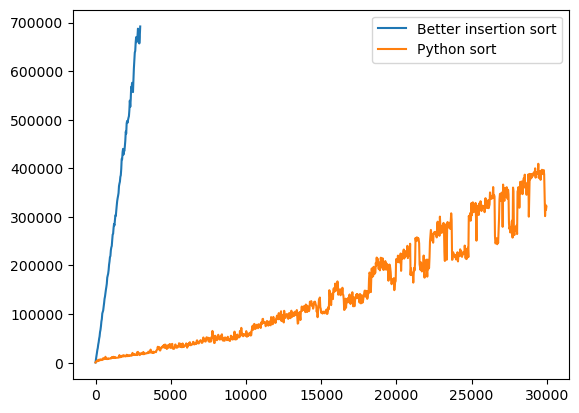

In [43]:
k = 100
N_default = 30000
step = 30
n_errors = 10
times_default = np.zeros((N_default//step, k))
for i in tqdm(range(1, N_default, step)):
    for j in range(k):
        ar = list(range(i))
        for _ in range(n_errors):
            a, b = np.random.randint(0, i, 2)
            ar[a], ar[b] = ar[b], ar[a]
        t0 = time_ns()
        sorted(ar)
        times_default[i//step, j] = time_ns() - t0

plt.plot(np.arange(N//step)*step, np.mean(times, axis=1), label="Better insertion sort")
plt.plot(np.arange(N_default//step)*step, np.mean(times_default, axis=1), label="Python sort")
plt.legend()

# In python

Complexity of various operations in python on common data structures and numpy array

## `list`

### Requirerments

Store a number values
 - compact
 - ordered
 - $O(1)$ access time to values
 

==> **array**

\+ $O(1)$ append and pop time

### Dynamic list

**Reserve** more space than necessary to avoid making a **copy** each time an element is added

- array of size N
- length (number of elements) L
- $N \ge T \times L$ 

#### `append`
<img src="figures/dynamic_list.svg" style="width: 60%" align="left">

In [44]:
import sys
from time import monotonic_ns
from random import random
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

N_list = 1000
N = 500_000 
times = np.zeros(N+1)
sizes = np.zeros(N+1)

lists = [[] for _ in range(N_list)]
times[0] = monotonic_ns()
sizes[0] = sys.getsizeof(lists[0])
for i in tqdm(range(N)):
    for j in range(N_list):
        lists[j].append(random())
    times[i+1] = monotonic_ns()
    sizes[i+1] = sys.getsizeof(lists[0])

del lists
times[1:] -= times[:-1]
times[0] = 0
times /= N_list

100%|███████████████████████████████████████████████████████████████████████████████████| 500000/500000 [00:40<00:00, 12297.18it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 500000/500000 [00:36<00:00, 13615.97it/s]


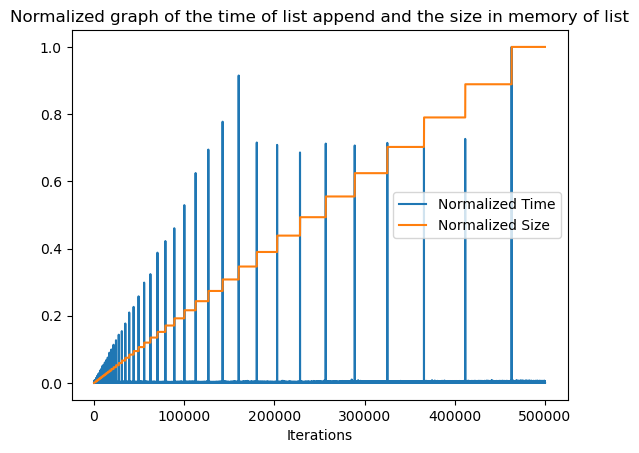

In [11]:
plt.plot(times/np.max(times), label="Normalized Time")
plt.plot(sizes/np.max(sizes), label="Normalized Size")
plt.xlabel("Iterations")
plt.title("Normalized graph of the time of list append and the size in memory of list")
plt.legend()

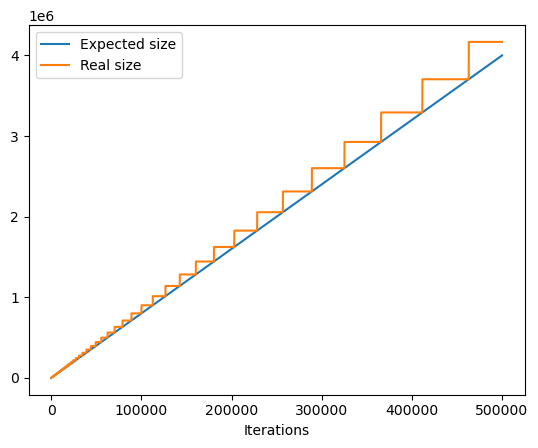

In [12]:
plt.plot(np.arange(N)*8, label="Length")
plt.plot(sizes, label="Real size")
plt.xlabel("Iterations")
plt.legend()

### Complexity of `list`

| Operation             | Average Case  | Amortized Worst Case  |
|-----------------------|---------------|-----------------------|
|  Copy                 | O(n)          | O(n)                  |
|  Append[1]            | O(1)          | O(1)                  |
|  Pop last             | O(1)          | O(1)                  |
|  Pop intermediate[2]  | O(n)          | O(n)                  |
|  Insert               | O(n)          | O(n)                  |
|  Get Item             | O(1)          | O(1)                  |
|  Set Item             | O(1)          | O(1)                  |
|  Delete Item          | O(n)          | O(n)                  |
|  Iteration            | O(n)          | O(n)                  |
|  Get Slice            | O(k)          | O(k)                  |
|  Del Slice            | O(n)          | O(n)                  |
|  Set Slice            | O(k+n)        | O(k+n)                |
|  Extend[1]            | O(k)          | O(k)                  |
|  Sort                 | O(n log n)    | O(n log n)            |
|  Multiply             | O(nk)         | O(nk)                 |
|  x in s               | O(n)          |                       |
|  min(s), max(s)       | O(n)          |                       |
|  Get Length           | O(1)          | O(1)                  |

In [32]:
np.diff(np.where(np.diff(sizes)>0)[0]//4)

array([    1,     1,     2,     2,     2,     2,     3,     3,     3,
           4,     4,     5,     5,     6,     7,     8,     9,    10,
          11,    12,    14,    16,    18,    20,    22,    25,    28,
          32,    36,    40,    45,    51,    57,    64,    72,    81,
          91,   103,   116,   130,   146,   165,   185,   208,   234,
         264,   297,   334,   376,   423,   475,   535,   602,   677,
         762,   857,   964,  1084,  1220,  1372,  1544,  1737,  1954,
        2198,  2473,  2782,  3130,  3521,  3961,  4456,  5013,  5640,
        6345,  7138,  8030,  9034, 10163, 11434, 12863])

In [ ]:
import sys
from time import monotonic_ns
from random import random
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

N_list = 1000
N = 500_000
times = np.zeros(N+1)
sizes = np.zeros(N+1)

lists = [list(np.random.random(N)) for _ in range(N_list)]
times[0] = monotonic_ns()
sizes[0] = sys.getsizeof(lists[0])
for i in tqdm(range(N)):
    for j in range(N_list):
        lists[j].pop()
    times[i+1] = monotonic_ns()
    sizes[i+1] = sys.getsizeof(lists[0])

del lists
times[1:] -= times[:-1]
times[0] = 0
times /= N_list


plt.plot(times/np.max(times), label="Normalized Time")
plt.plot(sizes/np.max(sizes), label="Normalized Size")
plt.xlabel("Iterations")
plt.title("Normalized graph of the time of list pop and the size in memory of list")
plt.legend()

## `dict`

### Requirerments

Store key -> value pairs
 - heterogenous keys
 - $O(1)$ access time to values
 - $O(1)$ key membership test
 

==> **hash table**

#### hash function

$$ H(x) :  \Omega \rightarrow \{n \in \mathbb{N}\;|\; n < N \}$$

<img src="https://upload.wikimedia.org/wikipedia/commons/5/58/Hash_table_4_1_1_0_0_1_0_LL.svg" style="width: 400px" align="center">

#### hash table

Use the hash of the key as the index where to store the value in the table

In practice **two** hash functions are chained together:
 - primary hash functions
 - auxillary hash functions which depends on the number of buckets (modulo)

<img src="figures/hash_table.svg" style="height: 60%" align="center">

#### hash collisions

<img src="figures/hash_table_collision1.svg" style="width: 50%" align="center">

Solutions: 
- Each bucket contains a chained list
- **Open adressing**

#### open adressing
<img src="figures/hash_table_probe.svg" style="width: 50%" align="center">

Probing sequence from a **linear congruential generator**:
 - pseudo-random --> avoid clusturing
 - ensures that each bucket is visited once

### The python `dict`

```python
hash_table = [None, 1, None, 2, None, 0, None, None]
entries = [
    (-1182584047114089363, 'one', 1),
    (542403711206072985, 'two', 2),
    (4677866115915370763, 'three', 3),
    ('--', '--', '--'),
    ('--', '--', '--')
]
```

 - the hash table is more compact
 - entries are in order of insertions
 - the entries list is 2/3 the size of the hash table
 - resizes when entries is full (load factor of 2/3)


| Operation      | Average Case  | Amortized Worst Case  |
|----------------|---------------|-----------------------|
|  k in d        | O(1)          | O(n)                  |
|  Copy[3]       | O(n)          | O(n)                  |
|  Get Item      | O(1)          | O(n)                  |
|  Set Item[1]   | O(1)          | O(n)                  |
|  Delete Item   | O(1)          | O(n)                  |
|  Iteration[3]  | O(n)          | O(n)                  |

## `np.ndarray`


### Of `views` and `arrays`

Basic structure of a numpy `ndarray`
 - a type (int, float, uint8, etc)
 - a size $N$
 - a shape (n0, n1, ..., nd) with $n_0 \times n_1 \times ... \times n_d = N$
 - an order (C or F)
 - a buffer of size $N\times \rm{sizeof} (type)$ containing the data
 
The data layout is **flat** and **compact** and how to access the data is informed by the shape, the type and the order.

For a 3D array in C order (row-major)
$i = x + n_0 \times y + n_0n_1 \times z$

Operations which only require changing the shape, or the order are $O(1)$, no copy needed
 - `reshape`
 - `ravel` (`flatten` always makes a copy)
They return a **view** of the array

Operations which change the size or type are $O(N)$, copy needed in a new buffer of appropriate size

### Indexing

#### Single-element

```python
x = ar[1, 2, 7]
ar[8, 0, 0] = x
```

- Copy of the value
- Access in constant time ($O(1)$)

#### Slicing

```python
x = ar[1:, :, :7]
ar[8, ::-1, 0] = y
```
- Returns a view of the array in constant time ($O(1)$)
- Assignment via broadcasting ($O(k)$) 


#### Advanced indexing
- Integer indexing
- Boolean indexing (masks)

```python
x = ar[ar>13] # copy !
x = ar[[9, 5, 2]] # copy !
ar[ar>13] = y
```

- Returns a new array containing the data ($O(k)$ or $O(n)$)
- Assignement by iterating over the array ($O(k)$ or $O(n)$)

# SIMD

<img src="figures/SIMD.png" style="width: 40%" align="center">

When broadcasting, numpy uses SIMD if available

# Prefer using big instructions rather than lots of small instructions

- Interactions with the interpreter are slow
- Object creation is slow

==> Prefer using big instructions (eg. broadcasting with numpy) to limit interactions with the interpreter

# Space-Time trade-off

 - faster computation at the cost of more memory usage (eg. caching)
 - smaller memory footprint at the cost of more computation (eg. compression)

## Exemple: fibonacci sequence

$$ F_n = F_{n-1} + F_{n-2}, \\
\text{where}, F_0 = 0\; \text{and}\; F_1 = 1$$

### Naive recursive implementation

In [13]:
n_ops = 0

def Fibonacci(N:int):
    global n_ops
    n_ops += 1
    # Base Case
    if (N < 2):
        return N

    # Recursively computing the term
    # using recurrence relation
    return Fibonacci(N - 1) + Fibonacci(N - 2)


print(Fibonacci(35))
print(n_ops)

9227465
29860703


$$C_n = 1 + \frac{2}{\sqrt{5}} \left(\frac{1 - \phi^n}{1-\phi} - \frac{1-\phi'^n}{1-\phi'}\right)$$
where $\phi = \frac{1 + \sqrt{5}}{2}$ is the golden ratio and $\phi' = -\frac{1}{\phi}$

Time complexity: $O(\phi^n)$

Auxillary space: $O(1)$

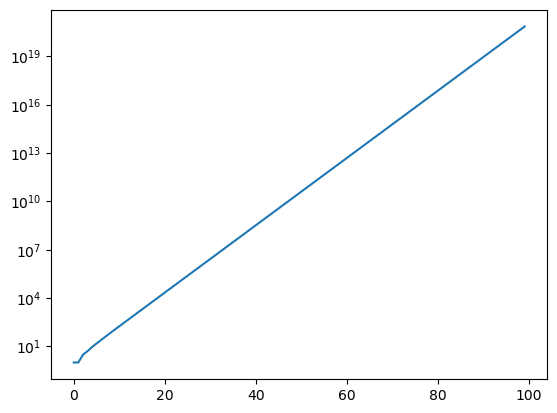

In [14]:
import matplotlib.pyplot as plt

phi = (1 + 5**0.5)/2
phi2 = -1/phi

def C_fibonacci(n):
    return 1 + 2*((1 - phi**n)/(1 - phi) - (1 - phi2**n)/(1 - phi2))/5**0.5

plt.plot([C_fibonacci(i) for i in range(100)])
plt.yscale("log")

### Memoization

Store intermediate results to only compute them once

In [15]:
from sys import getsizeof

n_ops = 0

def Fibonacci(N:int):
    global n_ops
    n_ops += 1
    
    # The whole sequence is stored to be reused
    f=[0]*(N + 2)
 
    # 0th and 1st number of the
    # series are 0 and 1
    f[0] = 0
    f[1] = 1
    
    for i in range(2,N+1) :
        n_ops += 1
        f[i] = f[i - 1] + f[i - 2]

    return f[N]


print(Fibonacci(35))
print(n_ops)

9227465
35


Time complexity: $O(n)$

Auxillary space: $O(n)$

In [16]:
from sys import getsizeof

n_ops = 0

def Fibonacci(N:int):
    global n_ops
    n_ops += 1

    a, b = 1, 0
    for i in range(2,N+1) :
        n_ops += 1
        a, b = a + b, a

    return a


print(Fibonacci(35))
print(n_ops)

9227465
35


Time complexity: $O(n)$

Auxillary space: $O(1)$

In [17]:
from functools import cache
from sys import getsizeof

n_ops = 0

@cache
def Fibonacci(N:int):
    global n_ops
    n_ops += 1
    # Base Case
    if (N < 2):
        return N

    # Recursively computing the term
    # using recurrence relation
    return Fibonacci(N - 1) + Fibonacci(N - 2)


print(Fibonacci(35))
print(n_ops)

9227465
36


Time complexity: $O(n)$

Auxillary space: $O(n)$ (but also permanent storage)

# Other sources of slow code

- IO
- system calls
- **memory access**
- **branches**

# A word on the architecture of processors

## Distance is time

### Von Neumann Architecture

<img src="https://computersciencewiki.org/images/1/1a/Cpu_diagram.png" style="width: 400px" align="left">
<img src="https://thecustomizewindows.cachefly.net/wp-content/uploads/2013/07/Von-Neumann-Architecture.jpg" style="width: 400px" align="right">

### Wavelength of a signal

$$ c = 170\;000\; \text{km/s} $$
$$ f = 3\; \text{GHz}$$

$$ d = \frac{c}{f} = 0,06 \;\text{m} $$

Quasistatic approximation invalid, resistive and capacitive effects must be taken into account.

### RC delay

At these frequencies a wire is similar to a resistor with a capacitor in parallel

<img src="https://upload.wikimedia.org/wikipedia/commons/e/e0/RC_Series_Filter_%28with_V%26I_Labels%29.svg" style="width: 400px" align="center">

$$\tau = RC = \rho c d^2$$

<img src="https://cdn.arstechnica.net/wp-content/uploads/archive/hardware/floorplan.jpg" style="width: 80%" align="center">


## How code is executed

<img src="figures/simple_cpu.png" style="width: 700px" align="center">


- Executing an instruction is a **sequential multistep** process
- Each step is handled by a **different** component of the CPU



==> Possibility of executing different operations at the same time

==> Pipelining by offsetting the execution of each instruction by one cycle

### RISC pipeline

5 steps:
 1. IF  - Instruction Fetch
 2. ID  - Instruction Decode
 3. EX  - Execute
 4. MEM - Memory access (LOAD & WRITE)
 5. WB  - Write Back

<img src="https://upload.wikimedia.org/wikipedia/commons/2/21/Fivestagespipeline.png" style="width: 700px" align="center">

### Hazards

- DATA hazard (multiple access to a same register)
- Structural hazard (resource scarcity)
- Control hazard (wrong branch / interuptions)
- Cache miss

#### Pipeline stall
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/67/Pipeline%2C_4_stage_with_bubble.svg/1280px-Pipeline%2C_4_stage_with_bubble.svg.png" style="width: 700px" align="center">



### Cache miss

 - MEM probes the cache
 - if cache miss --> fetch the data to higher level cache or RAM
 - --> **pipeline stall**
 
 **takes around 100 to 1000 cycles to fetch the data**

#### Prefetch

Prefetch memory into the cache by guessing what data comes next

Identify  regular access patterns (increasing, descending, regular jumps)

- hardware prefetch

- software prefetch
 

In [23]:
import numpy as np
from random import shuffle

N = 1_000_000
ar = list(np.random.random(N))

indexes = list(range(N))[::-1]
shuffled_indexes = indexes.copy()
shuffle(shuffled_indexes)

def ordered_op(x):
    for i in indexes:
        x[i] = np.sin(np.cos(x[i]))**2
        
def ordered_op2(x):
    for i in range(N):
        x[i] = np.sin(np.cos(x[i]))**2
        
def random_op(x):
    for i in shuffled_indexes:
        x[i] = np.sin(np.cos(x[i]))**2
        
def ordered_op_np(x):
    x = np.array(x)
    x[indexes] = np.sin(np.cos(x[indexes]))**2
        
def random_op_np(x):
    x = np.array(x)
    x[shuffled_indexes] = np.sin(np.cos(x[shuffled_indexes]))**2
    
def ordered_op_np_simd(x):
    x = np.array(x)
    x[:] = np.sin(np.cos(x[::]))**2

In [24]:
%timeit ordered_op(ar)
%timeit ordered_op2(ar)
%timeit random_op(ar)
%timeit ordered_op_np(ar)
%timeit random_op_np(ar)

770 ms ± 5.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
753 ms ± 3.61 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.04 s ± 4.45 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
141 ms ± 481 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
297 ms ± 4.93 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [22]:
%timeit ordered_op_np_simd(ar)

34.3 ms ± 227 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
import numpy as np


def natural_sort(ar, key = lambda x: x):
    previous = ar[0]
    ordered = [ar[0]]
    unordered = []
    for el in ar[1:]:
        if key(el) >= previous:
            previous = key(el)
            ordered.append(el)
        else:
            unordered.append(el)
    return ordered, unordered

def chain_natural_sort(ar, key = lambda x: x):
    unordered = ar
    ordered_lists = []
    while unordered:
        o, u = natural_sort(unordered, key)
        if o:
            ordered_lists.append(o)
            unordered = u
        else:
            ordered_lists.append(u[::-1])
            unordered = None
        
    return ordered_lists

def merge(l1, l2, key = lambda x: x):
    i1, i2 = 0, 0
    n = len(l1) + len(l2)
    ordered = [0]*n
    while i1 + i2 < n and i1 < len(l1) and i2 < len(l2):
        if key(l1[i1]) < key(l2[i2]):
            ordered[i1 + i2] = l1[i1]
            i1 += 1
        else:
            ordered[i1 + i2] = l2[i2]
            i2 += 1
    while i1 < len(l1):
        ordered[i1 + i2] = l1[i1]
        i1 += 1
    while i2 < len(l2):
        ordered[i1 + i2] = l2[i2]
        i2 += 1
    return ordered

def k_merge(ordered_lists, key = lambda x: x):
    n = len(ordered_lists)
    if n%2 == 1:
        last = ordered_lists.pop()
        ordered_lists[-1] = merge(ordered_lists[-1], last, key)
    while len(ordered_lists) > 1:
        new_ordered = []
        for l1, l2 in zip(ordered_lists[::2], ordered_lists[1::2]):
            new_ordered.append(merge(l1, l2, key))
        ordered_lists = new_ordered
    return ordered_lists[0]

ar = list(np.random.randint(1, 100, 30))
print(ar)
ol = chain_natural_sort(ar)
print(ol)
s = k_merge(ol)
print(s)